In [96]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as StandardScaler
from scipy import stats
from scipy.stats import kurtosis 
from scipy.stats import skew 
from scipy.stats import norm 

%matplotlib inline

In [97]:
data = pd.read_csv('properties_data.csv')
data.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [99]:
data.price.describe() #shows us how the the price coloumn of the data is distributed

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

In [100]:
#with this data we shall find the kurtosis and the skewness of the prices 

skew = data.price.skew() #measures the symmetry in a distribution
kurt = data.price.kurt() #measures the the weight of the tails 

In [101]:
print(skew,kurt)

6.147402649613236 48.85657191420995


In [102]:
print('Skewness: ', format(skew))
print('Kurtosis: ', format(kurt))

Skewness:  6.147402649613236
Kurtosis:  48.85657191420995


C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

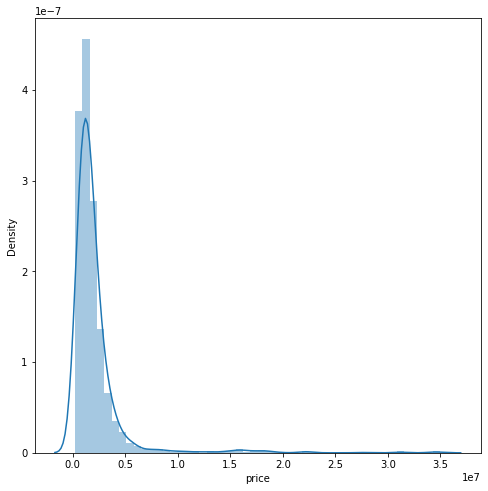

In [103]:
#data shows high skewness, let's plot this on a diagram

fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data.price)

In [104]:
#distribution leaning to the left

data_lt5 = data[data.price < 5000000]
data_mt5 = data[data.price >= 5000000]
data_lt5.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [105]:
#in the previous step we have created two variables in order to split the prices coloumn into price points that are Less Than
#5M and price points that are more than 5m

data_lt5.price.describe()



count    1.816000e+03
mean     1.587953e+06
std      9.508697e+05
min      2.200000e+05
25%      8.575000e+05
50%      1.389950e+06
75%      2.043860e+06
max      4.996000e+06
Name: price, dtype: float64

In [106]:
data_mt5.price.describe()

count    8.900000e+01
mean     1.224476e+07
std      7.448623e+06
min      5.045846e+06
25%      5.876888e+06
50%      9.209000e+06
75%      1.620000e+07
max      3.500000e+07
Name: price, dtype: float64

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

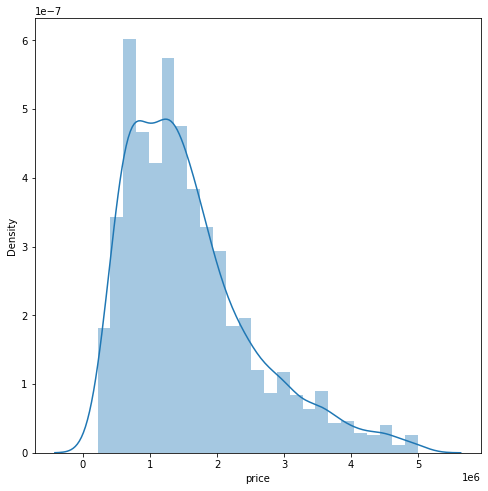

In [107]:
#from the above analysis we can see that we have 89 results that are more than 5m while the rest are not
#this great variance in the result might affect our analysis so we will remove the data

fig, ax = plt.subplots(figsize = (8,8))
sns.distplot(data_lt5.price)

In [108]:
# above is the distribution of house prices that are less than 5m

print('Skewness_lt5: ',format(data_lt5.price.skew()))
print('Kurtosis_lt5: ', format(data_lt5.price.kurt()))
      
      

Skewness_lt5:  1.1414780456481428
Kurtosis_lt5:  1.067955810175746


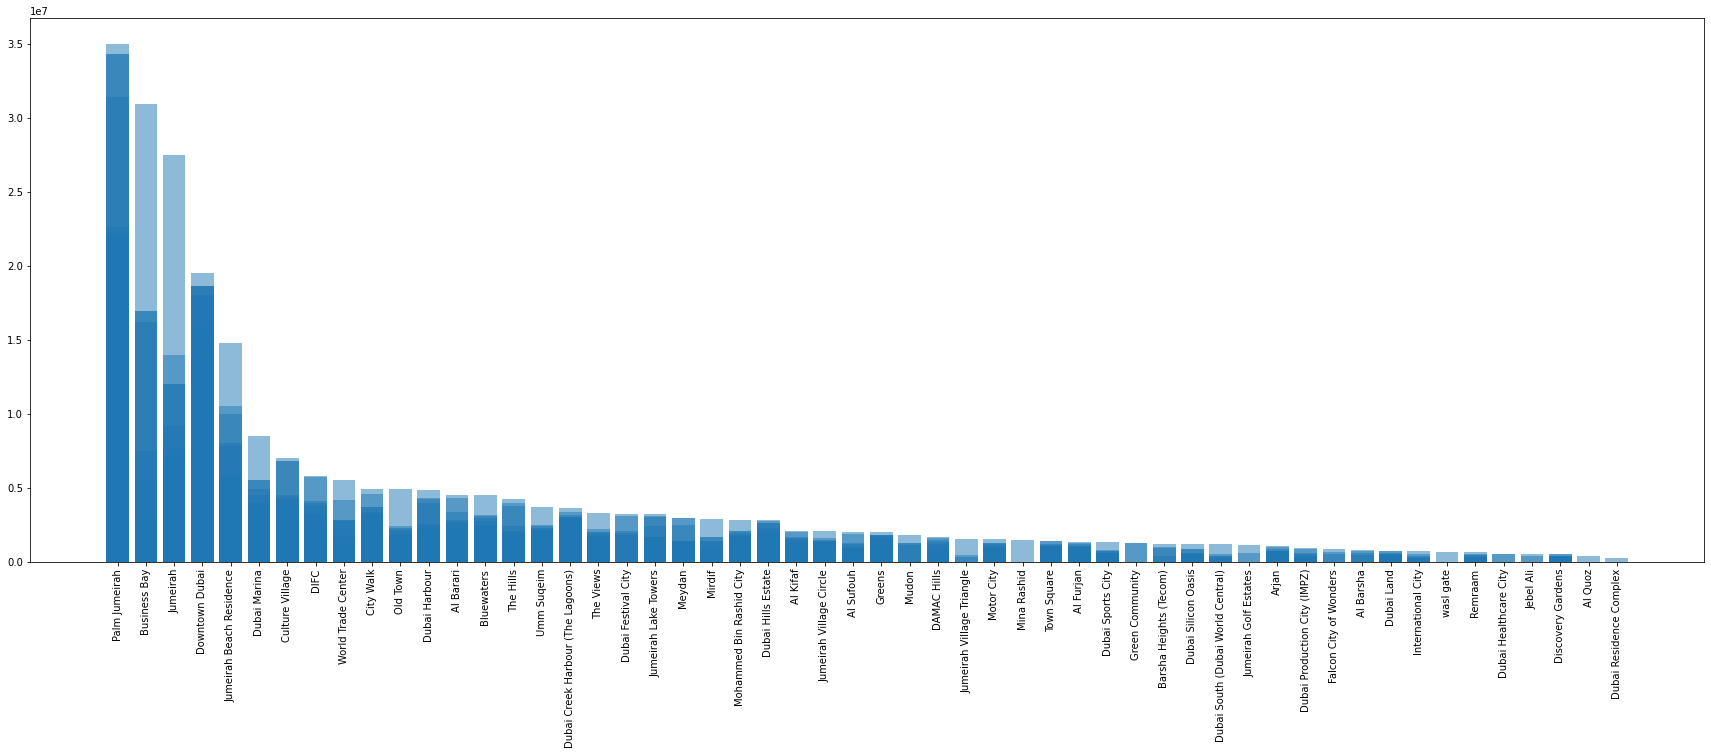

In [112]:
#even though the skewness is above one it is still better than the previous score of 6+
#The next section will look at the relationship between price and location

data_neighbor_price = data[['price','neighborhood']].sort_values(by=['price'], ascending = False)

plt.figure(figsize = (30, 10))
plt.bar(data_neighbor_price.neighborhood, data_neighbor_price.price, align = 'center', alpha = 0.5)
plt.xticks(rotation = 'vertical')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

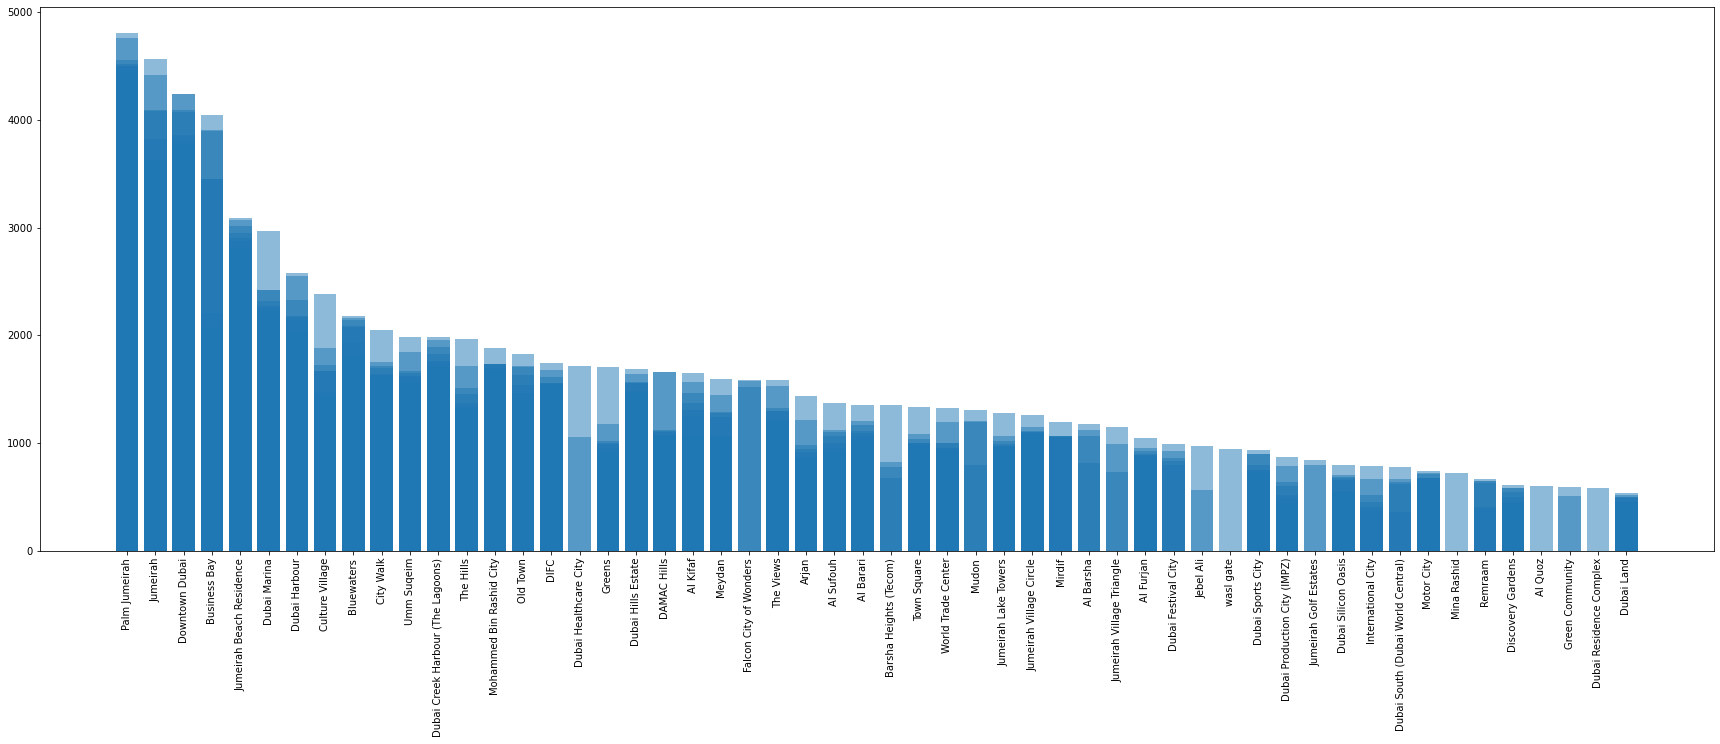

In [113]:
#analysing sqft price and location

data_sqftprice_location = data[['price_per_sqft', 'neighborhood']].sort_values(by='price_per_sqft', 
                                                                          ascending = False)
data_sqftprice_location['neighborhood'].nunique()

plt.figure(figsize = (30,10))
plt.bar(data_sqftprice_location.neighborhood, data_sqftprice_location.price_per_sqft, align = 'center', alpha = 0.5)
plt.xticks(rotation = 'vertical')
plt.show

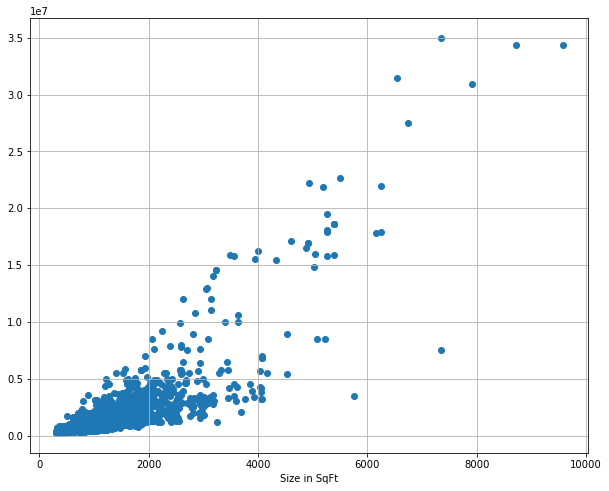

In [111]:
#now we analyze price and area 

plt.figure(figsize = (10,8))
feature = 'size_in_sqft'
plt.scatter(data[feature], data['price'])
plt.xlabel('Size in SqFt')
plt.grid(True)

<function matplotlib.pyplot.show(close=None, block=None)>

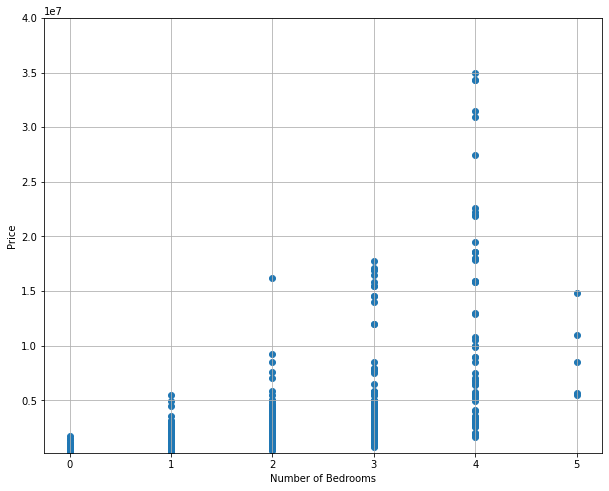

In [121]:
#price vs number of bedrooms

data_price_bedrooms = data[['price', 'no_of_bedrooms']].sort_values(by = 'price', ascending = False)


plt.figure(figsize = (10,8))
plt.scatter(data['no_of_bedrooms'],data['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ylim(ymin = 200000, ymax = 40000000)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

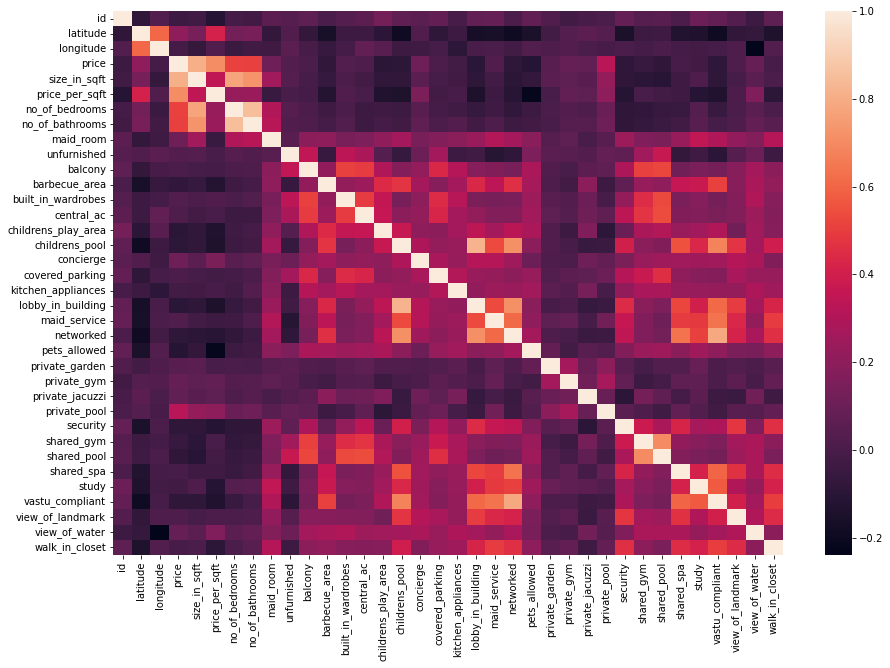

In [127]:
#Finally, finding overall correlation

fig, ax = plt.subplots(figsize = (15,10))
correlation = data.corr()
sns.heatmap(correlation,annot = False)
plt.show